In [1]:
import pandas as pd
import sklearn as sk
from datetime import datetime

now = datetime.now().strftime("%d/%m/%Y_%H:%M:%S")

print(f"notebook execution: {now}")

notebook execution: 03/01/2026_08:28:43


In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load predictions
df = pd.read_csv("../src/predictions.csv")

y_true = df["true_label"]
y_pred = df["predicted_label"]
y_score = df["predicted_score"]

# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred),
    "Recall": recall_score(y_true, y_pred),
    "F1": f1_score(y_true, y_pred),
    "ROC-AUC": roc_auc_score(y_true, y_score)
}

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print("Classification Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")   

Classification Metrics:
Accuracy: 0.9990
Precision: 0.9983
Recall: 0.9993
F1: 0.9988
ROC-AUC: 1.0000
Confusion Matrix: TN=15462, FP=20, FN=8, TP=11670


In [5]:
from sklearn.metrics import roc_curve
import numpy as np

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)
fnr = 1 - tpr
eer = fpr[np.nanargmin(np.absolute(fnr - fpr))]
print(f"EER: {eer:.4f}")   

EER: 0.0011


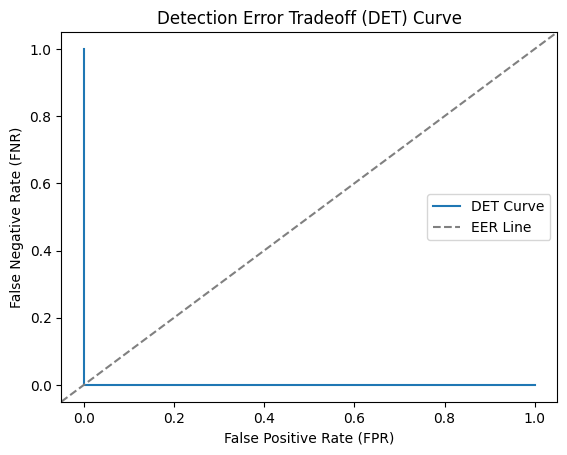

In [6]:
import matplotlib.pyplot as plt

plt.plot(fpr, fnr, label="DET Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("False Negative Rate (FNR)")
plt.axline((0, 0), (1, 1), linestyle="--", color="gray", label="EER Line")
plt.legend()
plt.title("Detection Error Tradeoff (DET) Curve")
# plt.savefig("det_curve.png")
plt.show()   

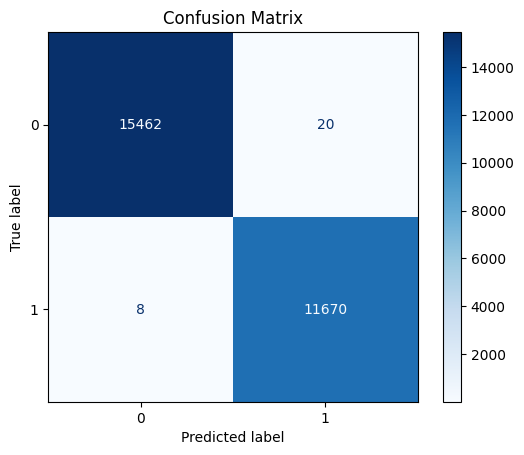

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
# plt.savefig("confusion_matrix.png")
plt.show()   

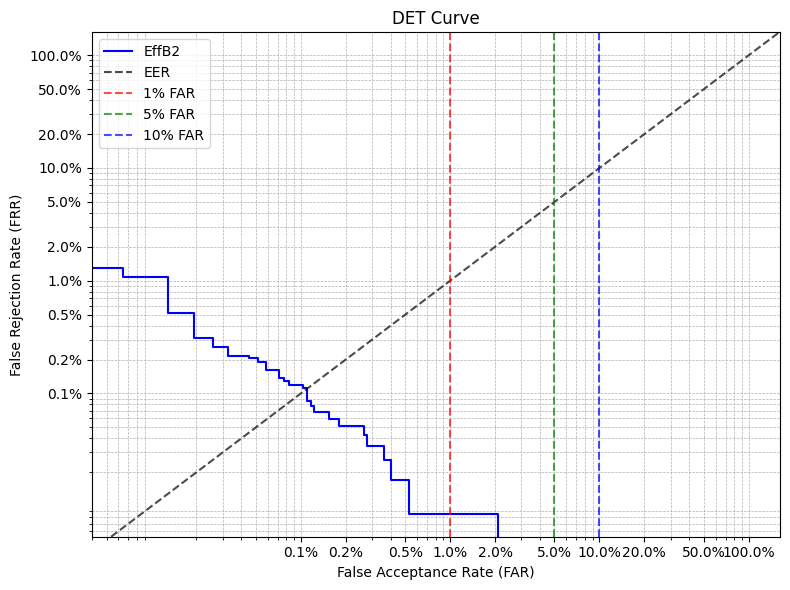

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import roc_curve

# Compute FPR, TPR, FNR
fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
fnr = 1 - tpr

# Compute EER
eer = fpr[np.nanargmin(np.abs(fnr - fpr))]

# Plot DET curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, fnr, label=f"EffB2", color="blue")

# Log scale with ISO-style ticks
ticks = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
plt.xscale("log")
plt.yscale("log")
plt.xticks(ticks)
plt.yticks(ticks)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Format axes
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.1%}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.1%}'))
plt.xlabel("False Acceptance Rate (FAR)")
plt.ylabel("False Rejection Rate (FRR)")
plt.title("DET Curve")

# Add vertical lines for operational points
plt.axline((0, 0), (1, 1), color='k', linestyle='--', alpha=0.7, label=f'EER')
plt.axvline(0.01, color='r', linestyle='--', alpha=0.7, label='1% FAR')
plt.axvline(0.05, color='g', linestyle='--', alpha=0.7, label='5% FAR')
plt.axvline(0.10, color='b', linestyle='--', alpha=0.7, label='10% FAR')

plt.legend()
plt.tight_layout()
plt.show()